In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

def unet_model(input_shape=(512, 512, 3)):
    inputs = layers.Input(shape=input_shape)

    # Encoder
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = layers.MaxPooling2D((2, 2))(c4)

    # Bottleneck
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # Decoder
    u6 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1])
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)  # Single channel for binary segmentation

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

In [4]:
# Import necessary libraries
from PIL import Image
import numpy as np

# Load the image
image_path = "/content/dogie.jpg"  # Correcting the image path
image = Image.open(image_path).resize((512, 512)).convert("RGB")
image_array = np.array(image) / 255.0  # Normalize the image

# Generate a synthetic mask (simple thresholding for example)
threshold_value = 0.5  # Example threshold
mask = (image_array[:, :, 0] > threshold_value).astype(np.uint8)  # Example mask
mask = np.stack([mask]*3, axis=-1)  # Create a 3-channel mask
mask = np.expand_dims(mask[:, :, 0], axis=-1)  # Make it single channel for the model


In [5]:
# Create a dataset with the image and synthetic mask
X = np.array([image_array])  # Add a batch dimension
Y = np.array([mask])  # Add a batch dimension for the mask

In [6]:
# Define and compile the model
model = unet_model(input_shape=(512, 512, 3))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model (using the synthetic mask)
history = model.fit(X, Y, epochs=20, batch_size=1)  # Adjust batch size as needed

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 30s 30s/step - accuracy: 0.4047 - loss: 0.7008
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - accuracy: 0.5888 - loss: 0.6605
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - accuracy: 0.5888 - loss: 0.6055
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - accuracy: 0.5888 - loss: 0.5779
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.5888 - loss: 0.5442
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 0.5888 - loss: 0.5349
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - accuracy: 0.5888 - loss: 0.5203
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - accuracy: 0.5888 - loss: 0.5069
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - accuracy: 0.5892 - loss: 0.4938
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.5947 - loss: 0.4758
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.6267 - loss: 0.4544
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - accuracy: 0.7572 - loss

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


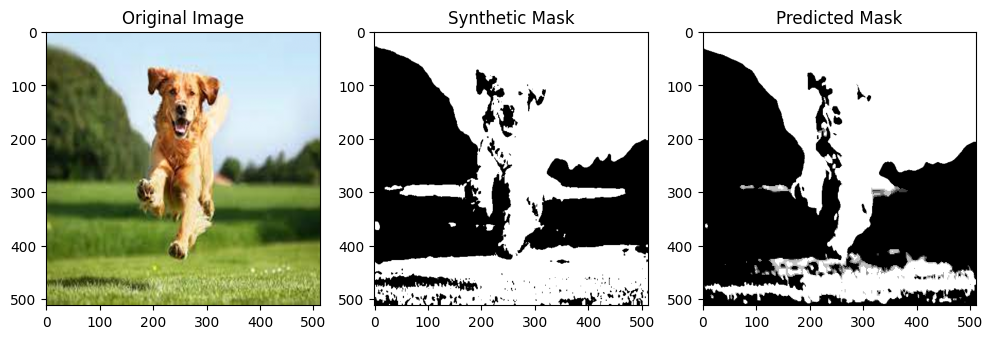

In [7]:
# Predict the segmentation
y_pred = model.predict(X)
y_pred = (y_pred > 0.5).astype(np.uint8)  # Convert probabilities to binary predictions

# Display the original image, synthetic mask, and prediction
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image_array)

plt.subplot(1, 3, 2)
plt.title("Synthetic Mask")
plt.imshow(mask[:, :, 0], cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Predicted Mask")
plt.imshow(y_pred[0, :, :, 0], cmap='gray')  # Show the first (and only) prediction

plt.show()